# Exploratory Data Analysis(EDA)
### Abhiram MV
#### Task 4 - Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’
#### As a security/defense analyst, try to find out the hot zone of terrorism. 

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings #Ignore the warnings
warnings.filterwarnings('ignore')

#### Reading the CSV file

In [2]:
df = pd.read_csv('globalterrorism.csv')

In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:
df.rename(columns={'iyear':'Year','imonth':'Month','city':'City','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df['Casualties'] = df.Killed + df.Wounded
df=df[['Year','Month','Day','Country','Region','City','latitude','longitude','AttackType','Killed','Wounded','Casualties','Target','Group','Target_type','Weapon_type']]

df.head()

,Year,Month,Day,Country,Region,City,latitude,longitude,AttackType,Killed,Wounded,Casualties,Target,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,1.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,1.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary


In [6]:
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
City             434
latitude        4556
longitude       4557
AttackType         0
Killed         10313
Wounded        16311
Casualties     16874
Target           636
Group              0
Target_type        0
Weapon_type        0
dtype: int64

In [7]:
print("Total countries:",df.Country.nunique())
print("Total number of regions:",df.Region.nunique())
print(f"Total number of terrorist attacks from {df.Year.min()} to {df.Year.max()} is {df.index.nunique()}")
print(f"Casualties consists of {int(df.Killed.sum())} killed and {int(df.Wounded.sum())} injured")

Total countries: 205
Total number of regions: 12
Total number of terrorist attacks from 1970 to 2017 is 181691
Casualties consists of 411868 killed and 523869 injured


In [8]:
print('Country with Highest Terrorist Attacks:',df['Country'].value_counts().index[0])
print('Region with Highest Terrorist Attacks:',df['Region'].value_counts().index[0])

Country with Highest Terrorist Attacks: Iraq
Region with Highest Terrorist Attacks: Middle East & North Africa


#### Terrorist incidenrs year on year

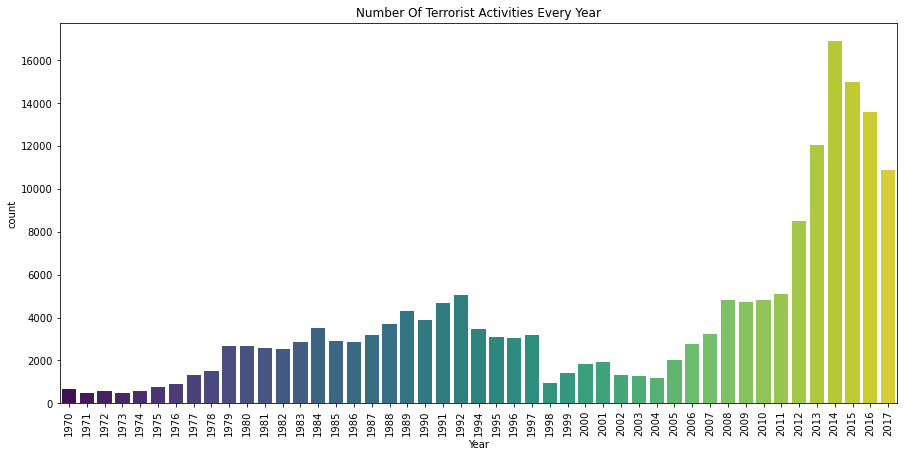

In [9]:
plt.subplots(figsize=(15,7))
sns.countplot('Year',data=df,palette='viridis')
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Every Year')
plt.show()

#### Terrorist attacks in each country

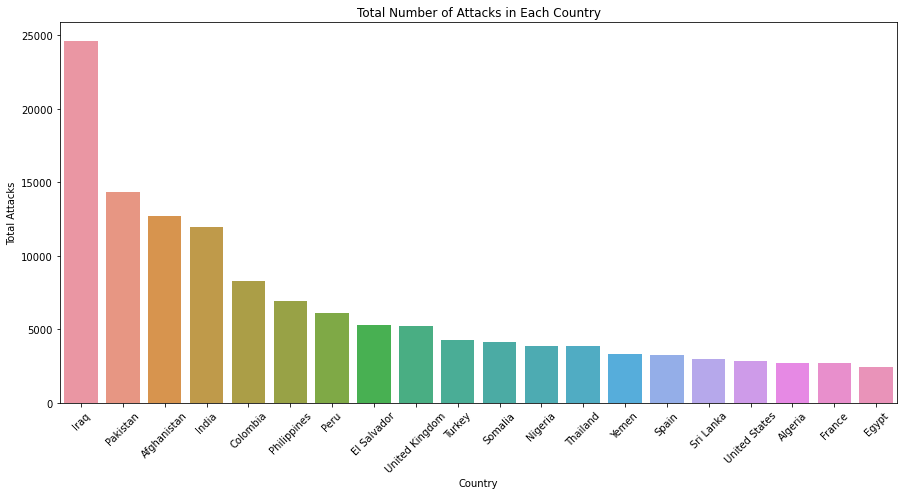

In [10]:
plt.subplots(figsize=(15,7))
attacks_country = df.Country.value_counts()[:20].reset_index()
attacks_country.columns = ['Country', 'Total Attacks']
sns.barplot(x=attacks_country.Country, y=attacks_country['Total Attacks'])
plt.xticks(rotation=45)
plt.title('Total Number of Attacks in Each Country')
plt.show()

Iraq has witnessed the largest number of terrorist activities followed by Pakistan.

#### Casualties every year

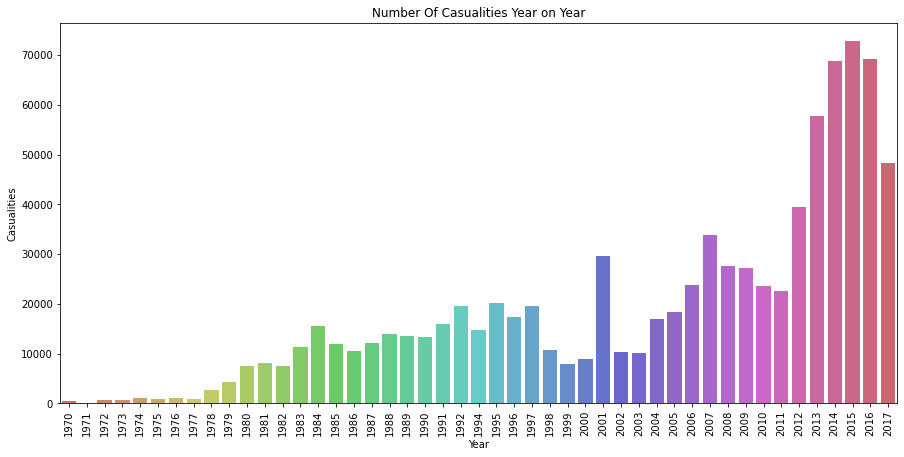

In [11]:
plt.subplots(figsize=(15,7))
year_casu = df.groupby('Year').Casualties.sum().reset_index()
year_casu.columns = ['Year','Casualities']
sns.barplot(x=year_casu.Year, y=year_casu.Casualities, palette='hls')
plt.xticks(rotation=90)
plt.title('Number Of Casualities Year on Year')
plt.show()

#### Attack type by terrorists

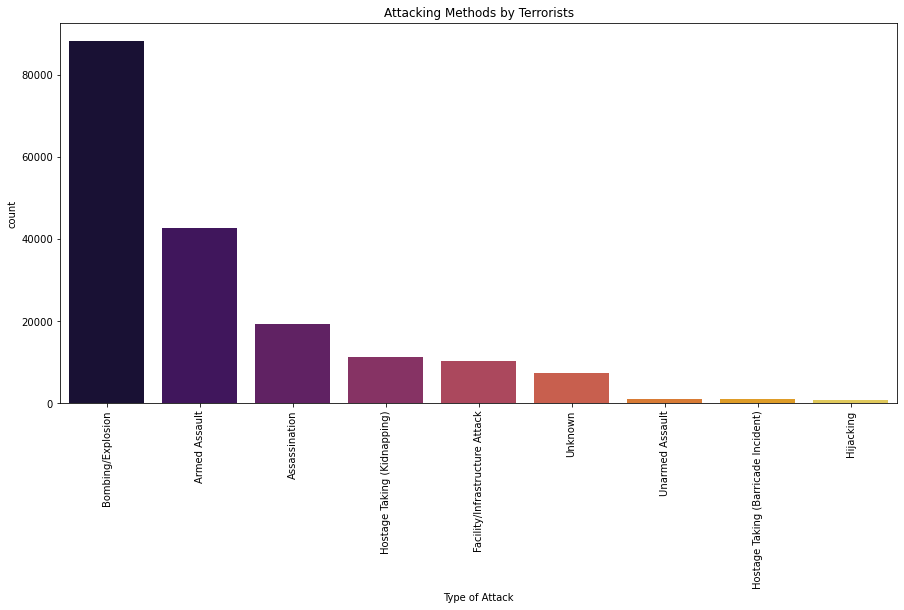

In [12]:
plt.subplots(figsize=(15,7))
sns.countplot('AttackType',data=df,palette='inferno',order=df['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel("Type of Attack")
plt.title('Attacking Methods by Terrorists')
plt.show()

In [13]:
#### Terrorist attacks by Region

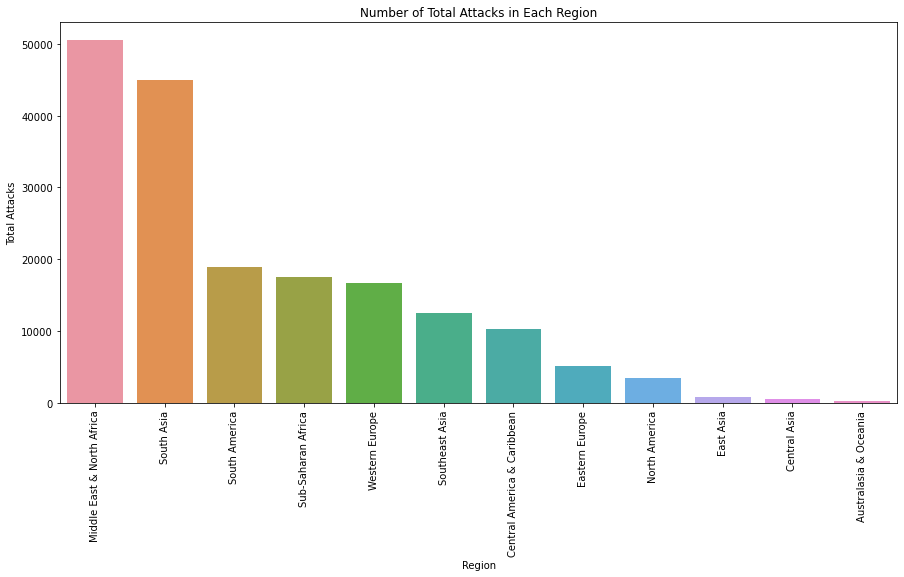

In [14]:
plt.subplots(figsize=(15,7))
attack_region = df.Region.value_counts().reset_index()
attack_region.columns = ['Region', 'Total Attacks']
sns.barplot(x=attack_region.Region, y=attack_region['Total Attacks'])
plt.xticks(rotation=90)
plt.title('Number of Total Attacks in Each Region')
plt.show()

Middle East and North Africa are the most terrorism prone regions followed by South Asia. The Australian region has experienced very few terrorist events.

#### Most attacked target

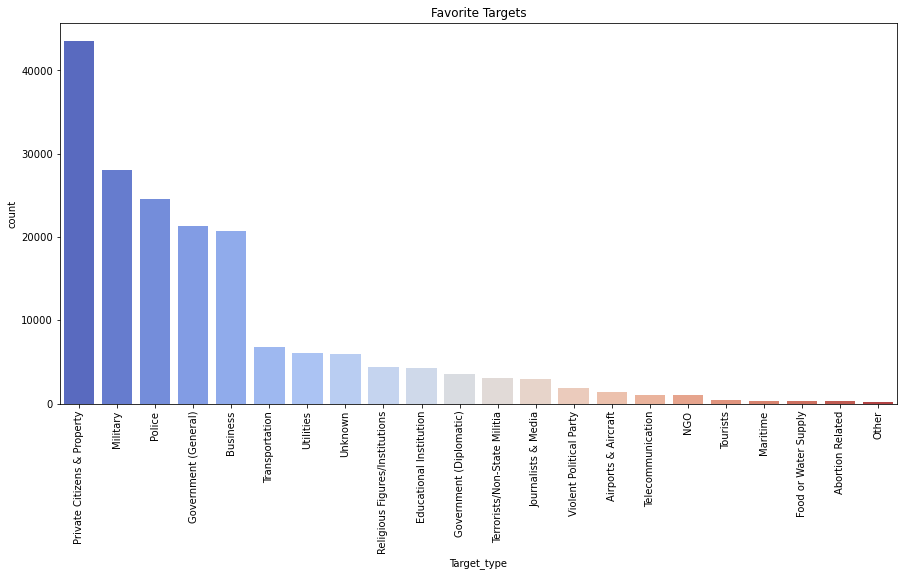

In [15]:
plt.subplots(figsize=(15,7))
sns.countplot(df['Target_type'],palette='coolwarm',order=df['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.show()

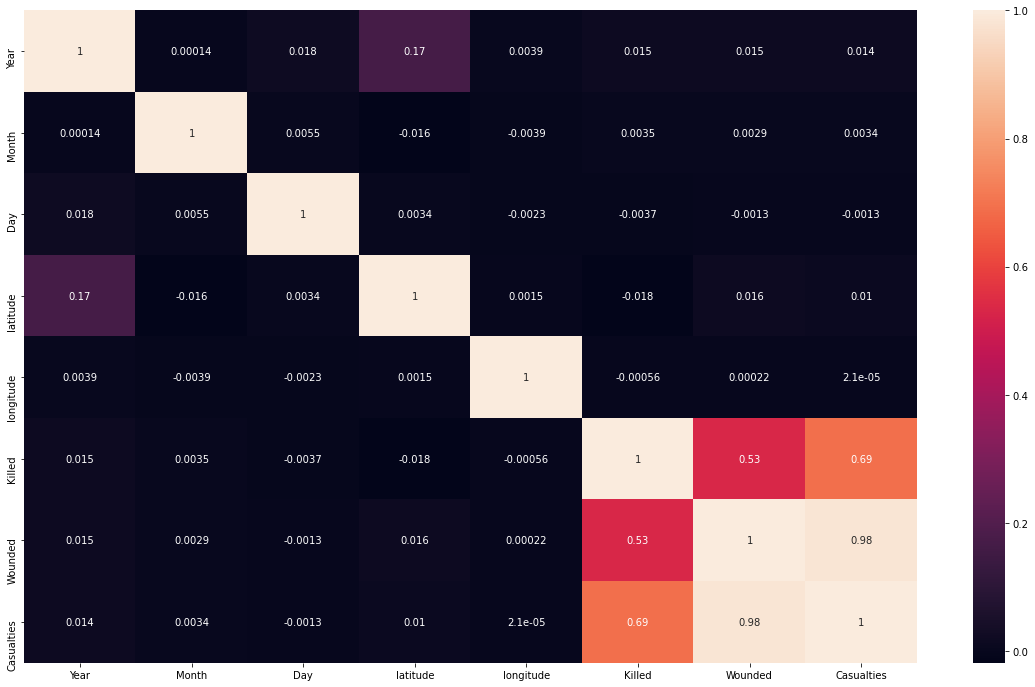

In [16]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True)

#### Trend in terror activities

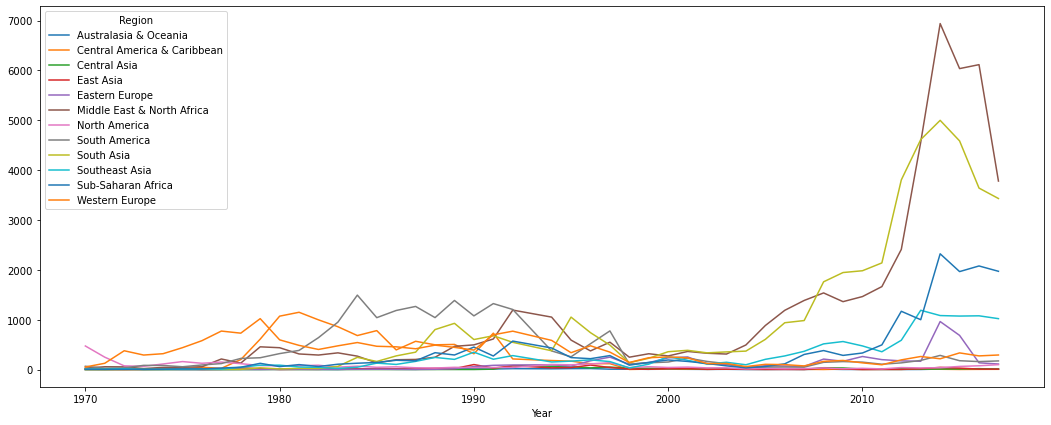

In [17]:
terror_region=pd.crosstab(df.Year,df.Region)
terror_region.plot(color=sns.color_palette('tab10',12))
fig=plt.gcf()
fig.set_size_inches(18,7)
plt.show()

In Middle-East,North Africa and South Asia there has been a shoot in the number of terrorist activities over the years.

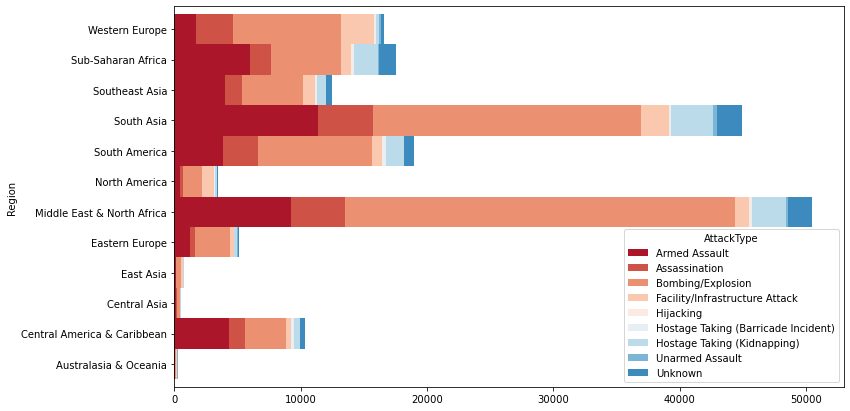

In [18]:
pd.crosstab(df.Region,df.AttackType).plot.barh(stacked=True,width=1,color=sns.color_palette('RdBu',10))
fig=plt.gcf()
fig.set_size_inches(12,7)
plt.show()

Bombing/Explosion and Armed assaults are the most prominent types of terror attacks

#### Terrorist groups with highest terror attacks

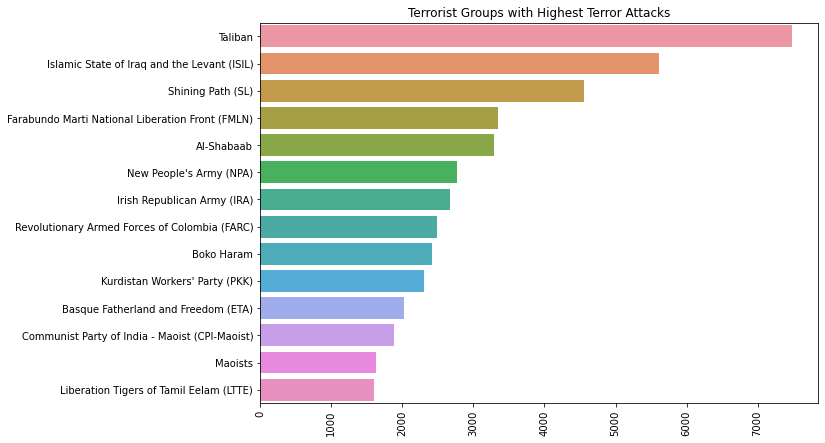

In [19]:
sns.barplot(df['Group'].value_counts()[1:15].values,df['Group'].value_counts()[1:15].index)#Exclude unknown
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,7)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

#### Number of attacks vs Killed

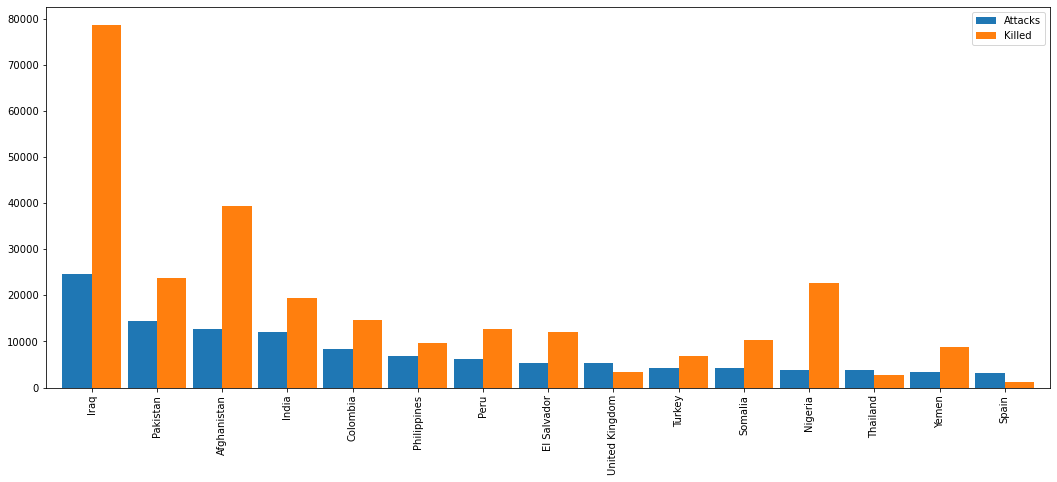

In [20]:
coun_terror=df['Country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=df.groupby('Country')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,7)
plt.show()

The number of killed in Iraq is almost 2 times more than Afghanistan

#### Activity of Top Terrorist Groups

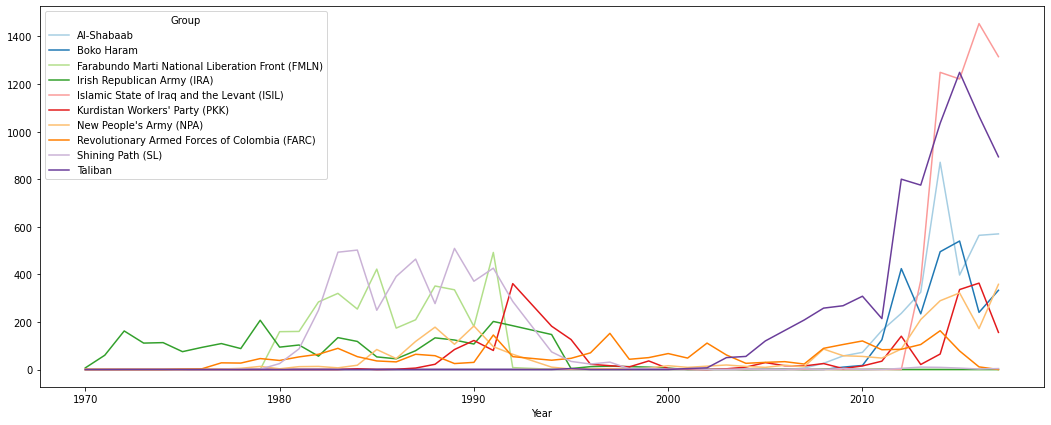

In [21]:
top_terror_groups=df[df['Group'].isin(df['Group'].value_counts()[1:11].index)] #Exclude unknown
pd.crosstab(top_terror_groups.Year,top_terror_groups.Group).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,7)
plt.show()